Apply perceptron to "learn" how to convert celcius to fahrenheit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([
    [1,-40],
    [1,-10],
    [1,0],
    [1,8],
    [1,15],
    [1,22],
    [1,38],
], dtype=float)

y = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)


In [ ]:

def calc_error(y_arr, x_arr, w, train=False):
    """
    calc_error computes the error for each input (+1 if it's wrong, 0 if it's correct)
    
    y_arr is the 1D array of known outputs
    x_arr is the 2D array of inputs (N rows (number of samples), m+1 columns (number of inputs/sample))
    w is the 1D array of weights (threshold + m weights)
    train is True if training (updating of weights) is to occur as a side effect.

    Returns: The sum of the absolute "error" found in iterating over all the samples
    """
    
    err_sum=0.0
    
    for j in range(len(y_arr)):
        y_out = x_arr[j].dot(w)
        err = y_arr[j]-y_out 
        
        err_sum += abs(err)
        if train:
            dw = eta*err*x_arr[j]
            w += eta*err*x_arr[j]                   # adjust the weights during training only

    return err_sum
    
def train(y, x, w):
    return calc_error(y, x, w, train=True)

def test(y, x, w):
    return calc_error(y, x, w)

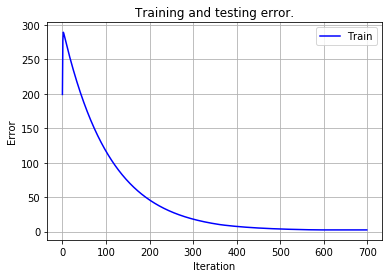

In [ ]:
eta=0.001 # how much should we "nudge" the weights each time?
w = np.random.rand(len(x[0]))*.05  # random array of "small" weights

err_test=[]
err_train=[]
train_iters=700
for i in range(train_iters):
    err_train.append(train(y, x, w))

plt.title("Training and testing error.")
plt.plot(range(train_iters),err_train,'b', label="Train")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.grid()

In [ ]:
print(w)

[31.75337327  1.78801366]


In [ ]:
y_calc = x.dot(w)  # calculate the final "y" output for each x
y_calc

array([-39.7671733 ,  13.87323663,  31.75337327,  46.05748259,
        58.57357824,  71.08967389,  99.69789251])

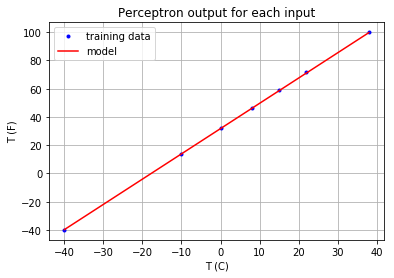

In [ ]:
#
# compare model to data
#
plt.title("Perceptron output for each input")
plt.plot(x[:,1],y,'b.',label="training data")
plt.plot(x[:,1],y_calc,'r-', label="model")
plt.xlabel("T (C)")
plt.ylabel("T (F)")
plt.grid()
plt.legend()